<a href="https://colab.research.google.com/github/nikhil-xyz/ImageClassification/blob/main/CFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model wiil be trained to distinguised 10 different image classes. Input samplees are taked from tensorflow-keras dataset.

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

scaling and inserting in new list

In [5]:
X = []
for img in x_train:
  X.append(img/255)
for img in x_test:
  X.append(img/255)

In [6]:
len(X)

60000

In [7]:
y = []
for img in y_train:
  y.append(img)
for img in y_test:
  y.append(img)

[6]


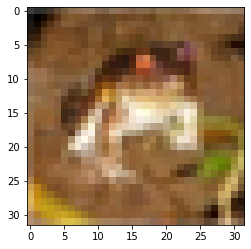

In [8]:
import matplotlib.pyplot as plt
plt.imshow(X[0])
print(y[0])

In [ ]:
X[0]

Organizing data in batches

In [10]:
import numpy as np

In [11]:
X = np.array(X)

In [12]:
dataset = tf.data.Dataset.from_tensor_slices((X, y))
dataset = dataset.cache()
dataset = dataset.shuffle(60000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8)

Splitting data into train, test, split

In [13]:
train = dataset.take(int(len(dataset)*0.7))
val = dataset.skip(int(len(dataset)*0.7)).take(int(len(dataset)*0.2))
test = dataset.skip(int(len(dataset)*0.9)).take(int(len(dataset)*0.1))

Data Augmentation

In [14]:
data_augmentation = keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(32, 32, 3)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1)
])

Model Building with Augmentation layer

In [15]:
from tensorflow.keras import models

In [16]:
cnn_with_augmentation = models.Sequential([
    data_augmentation,
    keras.layers.Conv2D(40, (3, 3), activation='relu'),
    keras.layers.MaxPool2D(),

    keras.layers.Conv2D(80, (3, 3), activation='relu'),
    keras.layers.MaxPool2D(),

    keras.layers.Conv2D(40, (3, 3), activation='relu'),
    keras.layers.MaxPool2D(),

    keras.layers.Dropout(0.3),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [17]:
cnn_with_augmentation.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
cnn_with_augmentation.fit(train, validation_data=val, epochs=20)

Epoch 1/20
2625/2625 [==============================] - 100s 37ms/step - loss: 1.7875 - accuracy: 0.3399 - val_loss: 1.4763 - val_accuracy: 0.4609
Epoch 2/20
2625/2625 [==============================] - 95s 36ms/step - loss: 1.5401 - accuracy: 0.4358 - val_loss: 1.3261 - val_accuracy: 0.5165
Epoch 3/20
2625/2625 [==============================] - 115s 44ms/step - loss: 1.4456 - accuracy: 0.4768 - val_loss: 1.3250 - val_accuracy: 0.5193
Epoch 4/20
2625/2625 [==============================] - 115s 44ms/step - loss: 1.3907 - accuracy: 0.4937 - val_loss: 1.1947 - val_accuracy: 0.5738
Epoch 5/20
2625/2625 [==============================] - 97s 37ms/step - loss: 1.3550 - accuracy: 0.5102 - val_loss: 1.1839 - val_accuracy: 0.5805
Epoch 6/20
2625/2625 [==============================] - 92s 35ms/step - loss: 1.3239 - accuracy: 0.5231 - val_loss: 1.1422 - val_accuracy: 0.5943
Epoch 7/20
2625/2625 [==============================] - 100s 38ms/step - loss: 1.2965 - accuracy: 0.5344 - val_loss: 1.09

Model Building without Augmentation

In [19]:
cnn_without_augmentation = models.Sequential([
    keras.layers.Conv2D(40, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPool2D(),

    keras.layers.Conv2D(80, (3, 3), activation='relu'),
    keras.layers.MaxPool2D(),

    keras.layers.Conv2D(40, (3, 3), activation='relu'),
    keras.layers.MaxPool2D(),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [20]:
cnn_without_augmentation.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
cnn_without_augmentation.fit(train, validation_data=val, epochs=20)

Epoch 1/20
2625/2625 [==============================] - 83s 31ms/step - loss: 1.5645 - accuracy: 0.4236 - val_loss: 1.3099 - val_accuracy: 0.5184
Epoch 2/20
2625/2625 [==============================] - 81s 31ms/step - loss: 1.2323 - accuracy: 0.5598 - val_loss: 1.1683 - val_accuracy: 0.5884
Epoch 3/20
2625/2625 [==============================] - 86s 33ms/step - loss: 1.0984 - accuracy: 0.6109 - val_loss: 0.9895 - val_accuracy: 0.6488
Epoch 4/20
2625/2625 [==============================] - 91s 35ms/step - loss: 1.0075 - accuracy: 0.6470 - val_loss: 0.8975 - val_accuracy: 0.6823
Epoch 5/20
2625/2625 [==============================] - 90s 34ms/step - loss: 0.9404 - accuracy: 0.6697 - val_loss: 0.8619 - val_accuracy: 0.6913
Epoch 6/20
2625/2625 [==============================] - 88s 34ms/step - loss: 0.8946 - accuracy: 0.6864 - val_loss: 0.8483 - val_accuracy: 0.7067
Epoch 7/20
2625/2625 [==============================] - 90s 34ms/step - loss: 0.8393 - accuracy: 0.7048 - val_loss: 0.8111 -

In [23]:
cnn_without_augmentation.evaluate(test)

375/375 [==============================] - 5s 8ms/step - loss: 0.5294 - accuracy: 0.8083


[0.5294471979141235, 0.8083333373069763]

In [24]:
classes = ["airplane", "automoile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [30]:
len(test)

375

In [58]:
x_test.shape

(10000, 32, 32, 3)

1/1 [==============================] - 0s 16ms/step


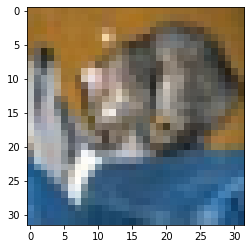

Actual Label :  cat
Predicted Label :  cat
1/1 [==============================] - 0s 18ms/step


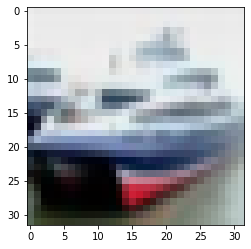

Actual Label :  ship
Predicted Label :  ship
1/1 [==============================] - 0s 16ms/step


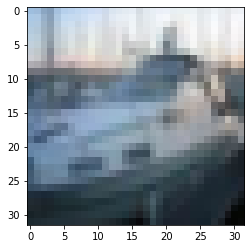

Actual Label :  ship
Predicted Label :  ship
1/1 [==============================] - 0s 19ms/step


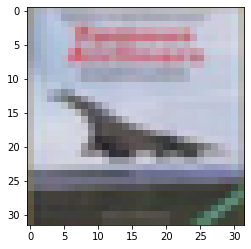

Actual Label :  airplane
Predicted Label :  airplane
1/1 [==============================] - 0s 15ms/step


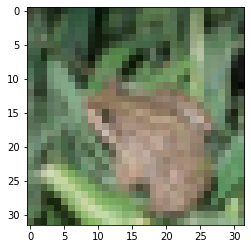

Actual Label :  frog
Predicted Label :  frog


In [65]:
for i in range(5):
  image, label = x_test[i]/255, y_test[i]
  # print(label)
  imageNew = np.expand_dims(image, axis=0)
  predImg = cnn_without_augmentation.predict(imageNew)
  # print(predImg)
  plt.figure()
  plt.imshow(image)
  plt.show()
  print("Actual Label : ", classes[label[0]])
  print("Predicted Label : ", classes[np.argmax(predImg)])

Generating Heatmap

In [158]:
x_test = x_test / 255

In [159]:
y_pred = cnn_without_augmentation.predict(x_test)

313/313 [==============================] - 4s 14ms/step


In [160]:
y_pred = [np.argmax(y) for y in y_pred]

In [161]:
y_pred = np.array(y_pred)

In [162]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred, num_classes=10)

In [163]:
import seaborn as sns

Text(87.0, 0.5, 'True')

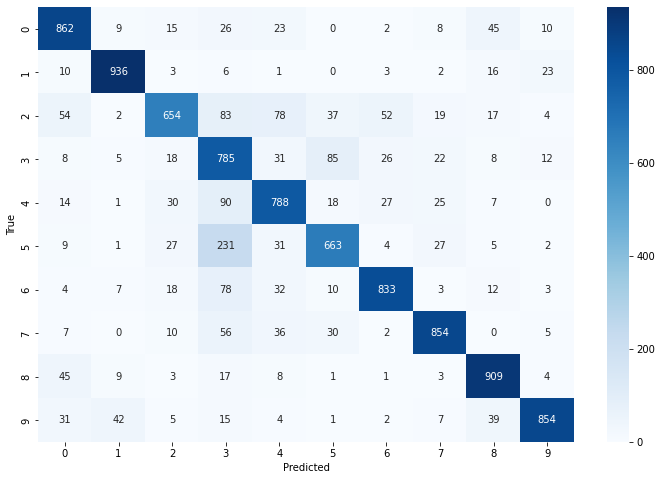

In [164]:
plt.figure(figsize = (12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')